<a href="https://colab.research.google.com/github/IlhamThrq/ComputerVision_TRK25/blob/main/Jobsheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 02: Klasifikasi Gambar

##Set-Up Template Library Visi Komputer

In [ ]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Deep Learning
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.applications import VGG16

# Computer Vision
import cv2
from PIL import Image, ImageOps

# Utilities
from tqdm import tqdm

# Preprocessing & Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Untuk upload file di Colab
from google.colab import files


##Praktikum

### Praktikum D1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

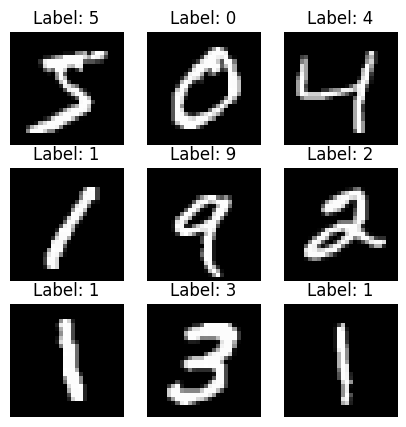

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

Tugas kecil: coba ganti range(9) dengan range(25) untuk menampilkan banyak contoh.

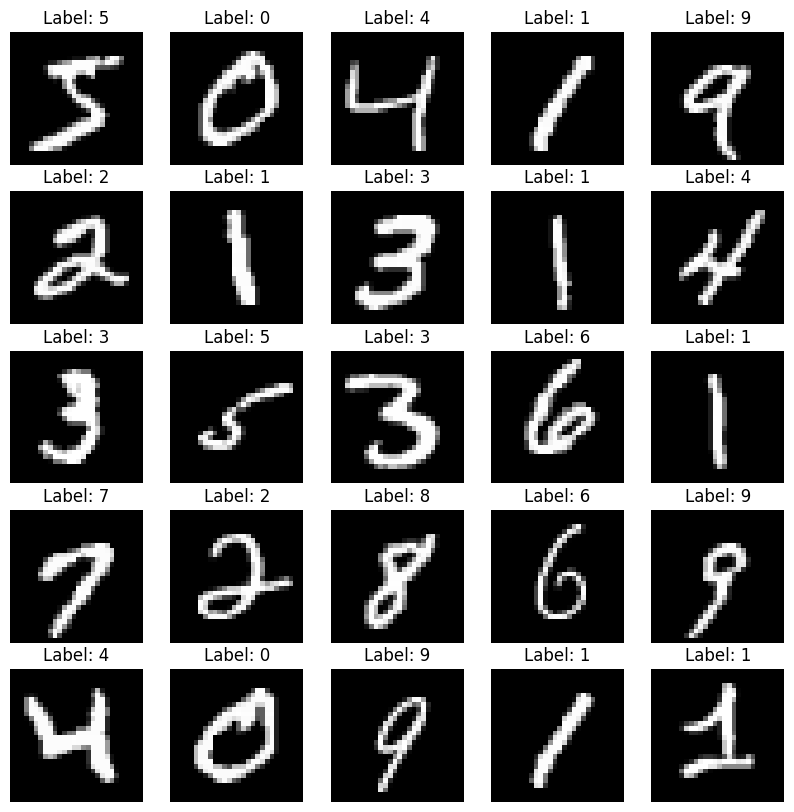

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure (figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

### Praktikum D2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [ ]:
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi SVM Linear: ", accuracy_score(y_test, y_pred))

Akurasi SVM Linear:  0.9101


Tugas kecil: ubah kernel dari linear menjadi rbf

In [ ]:
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi SVM RBF: ", accuracy_score(y_test, y_pred))

Akurasi SVM RBF:  0.9513


saya mencoba eksplor untuk versi SVM RBF bisa maksimal sampai berapa akurasinya? nah dengan tambahan tuning, gamma dan juga menambah sample tranining ternyata bisa menambah akurasinya

In [ ]:
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM RBF Tuned
clf = svm.SVC(kernel='rbf', C=10, gamma=0.01)
clf.fit(x_train_flat[:20000], y_train[:20000])
y_pred = clf.predict(x_test_flat)

print("Akurasi SVM RBF Tuned:", accuracy_score(y_test, y_pred))


Akurasi SVM RBF Tuned: 0.9751


###Praktikum D3: Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.8931 - loss: 0.3665 - val_accuracy: 0.9830 - val_loss: 0.0682
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9805 - loss: 0.0632 - val_accuracy: 0.9847 - val_loss: 0.0520
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9878 - loss: 0.0412 - val_accuracy: 0.9867 - val_loss: 0.0481
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9914 - loss: 0.0278 - val_accuracy: 0.9878 - val_loss: 0.0467
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9855 - val_loss: 0.0518


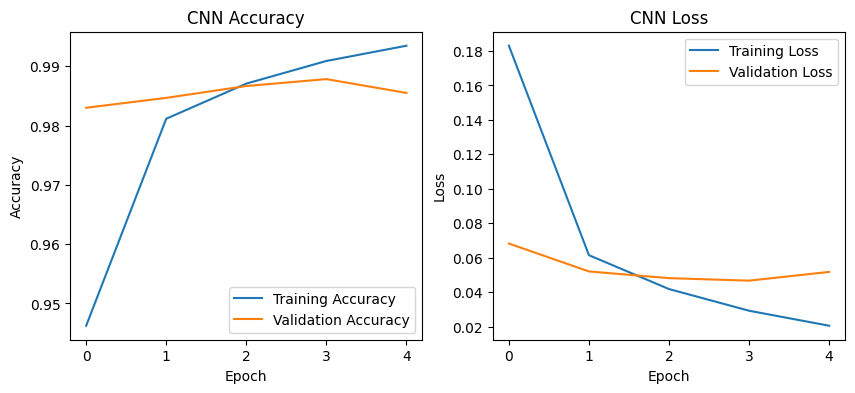

In [ ]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - accuracy: 0.8978 - loss: 0.3358 - val_accuracy: 0.9858 - val_loss: 0.0498
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9838 - loss: 0.0539 - val_accuracy: 0.9858 - val_loss: 0.0465
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9886 - loss: 0.0344 - val_accuracy: 0.9863 - val_loss: 0.0460
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 70s 29ms/step - accuracy: 0.9912 - loss: 0.0270 - val_accuracy: 0.9895 - val_loss: 0.0360
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9941 - loss: 0.0167 - val_accuracy: 0.9908 - val_loss: 0.0293


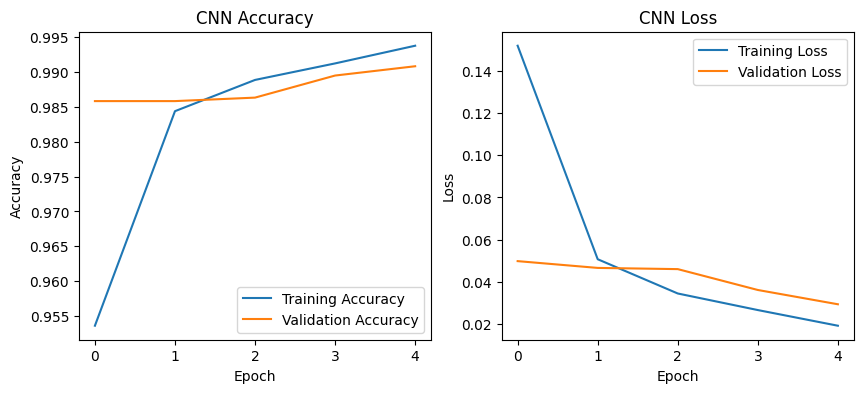

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), # Added Conv2D layer
    layers.MaxPooling2D((2, 2)), # Added MaxPooling2D layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Praktikum D4: Eksperimen dengan Dataset Lebih Kompleks (CIFAR - 10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 42ms/step - accuracy: 0.3774 - loss: 1.7124 - val_accuracy: 0.5656 - val_loss: 1.2318
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.5814 - loss: 1.1788 - val_accuracy: 0.6054 - val_loss: 1.1150
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 42ms/step - accuracy: 0.6453 - loss: 1.0150 - val_accuracy: 0.6590 - val_loss: 0.9793
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6746 - loss: 0.9345 - val_accuracy: 0.6840 - val_loss: 0.9162
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.7089 - loss: 0.8383 - val_accuracy: 0.6928 - val_loss: 0.9068
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7305 - loss: 0.7815 - val_accuracy: 0.6910 - val_loss: 0.9077
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.7509 - loss: 0.7214 - val_accuracy: 0.7038 - val_loss: 0.8837
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.7669 -

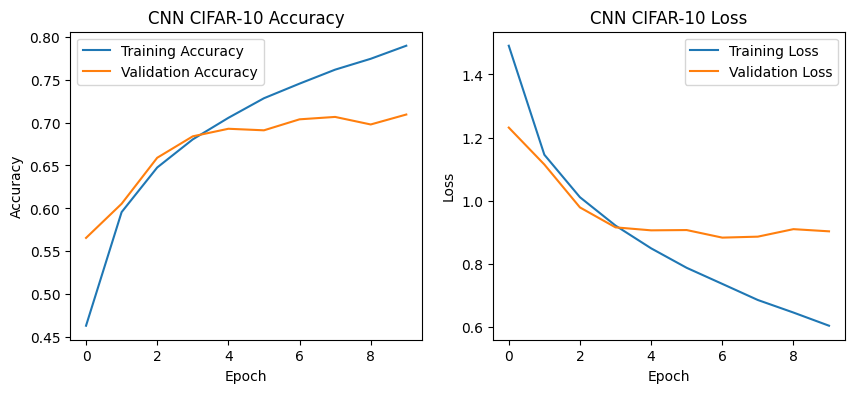

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas kecil: coba tambahkan Dropout(0.5) sebelum lapisan Dense terakhir?

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.2562 - loss: 1.9851 - val_accuracy: 0.5188 - val_loss: 1.3778
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.4429 - loss: 1.5178 - val_accuracy: 0.5544 - val_loss: 1.2663
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.4961 - loss: 1.3920 - val_accuracy: 0.6004 - val_loss: 1.1476
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.5286 - loss: 1.3127 - val_accuracy: 0.6262 - val_loss: 1.1153
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.5521 - loss: 1.2534 - val_accuracy: 0.6380 - val_loss: 1.0665
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.5731 - loss: 1.1928 - val_accuracy: 0.6602 - val_loss: 0.9962
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.5954 - loss: 1.1318 - val_accuracy: 0.6718 - val_loss: 0.9684
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.6111 -

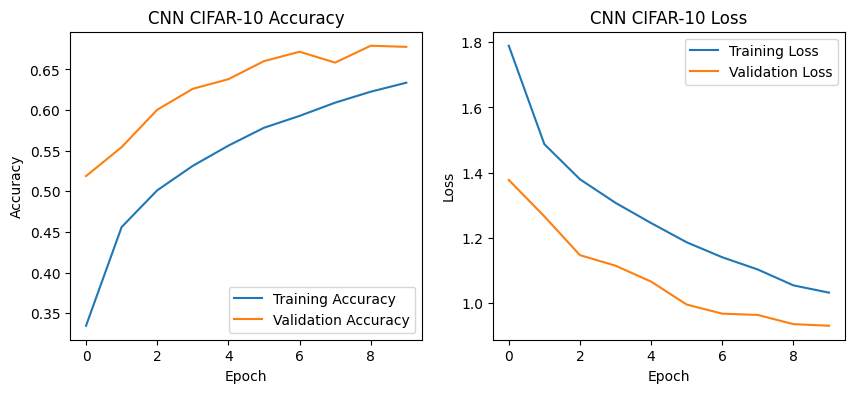

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # Added Dropout layer
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Praktikum D5: Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 580s 411ms/step - accuracy: 0.4610 - loss: 1.5512 - val_accuracy: 0.5732 - val_loss: 1.2168
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 588s 418ms/step - accuracy: 0.5768 - loss: 1.2104 - val_accuracy: 0.5916 - val_loss: 1.1595
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 551s 391ms/step - accuracy: 0.5999 - loss: 1.1471 - val_accuracy: 0.5986 - val_loss: 1.1288
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 571s 398ms/step - accuracy: 0.6204 - loss: 1.0926 - val_accuracy: 0.5934 - val_loss: 1.1657
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 584s 415ms/step - accuracy: 0.6288 - loss: 1.0649 - val_accuracy: 0.6116 - val_loss: 1.1187


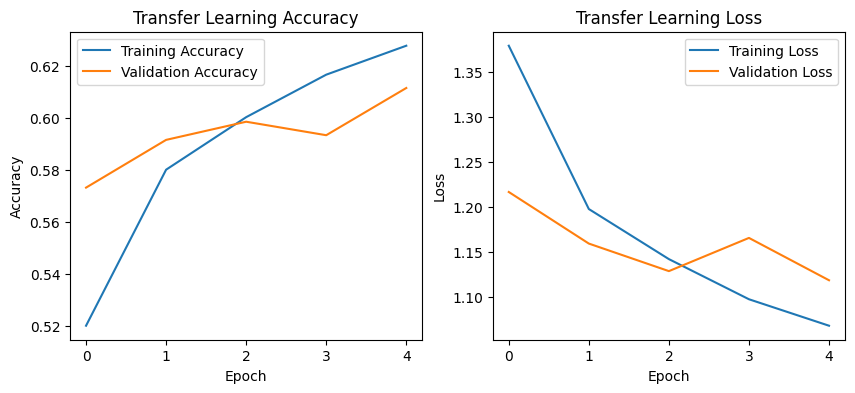

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32, 32, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tugas Kecil: Coba aktifkan 1-2 lapisan terakhir dari base_model (fine-tunning)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2391s 2s/step - accuracy: 0.5306 - loss: 1.3369 - val_accuracy: 0.6906 - val_loss: 0.8990
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2392s 2s/step - accuracy: 0.7077 - loss: 0.8489 - val_accuracy: 0.7208 - val_loss: 0.8181
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2350s 2s/step - accuracy: 0.7479 - loss: 0.7324 - val_accuracy: 0.7270 - val_loss: 0.7889
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2304s 2s/step - accuracy: 0.7746 - loss: 0.6502 - val_accuracy: 0.7292 - val_loss: 0.7956
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2297s 2s/step - accuracy: 0.7931 - loss: 0.5938 - val_accuracy: 0.7352 - val_loss: 0.8031


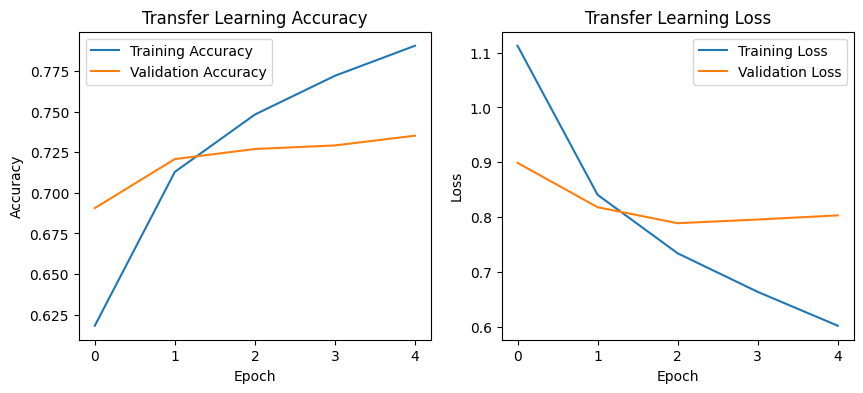

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(32, 32, 3))
# Freeze all layers in the base model initially
base_model.trainable = False

for layer in base_model.layers[-4:]:
    layer.trainable = True


model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Praktikum D6: Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 106s 338ms/step
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1000
           1       0.92      0.67      0.77      1000
           2       0.77      0.58      0.66      1000
           3       0.60      0.51      0.55      1000
           4       0.57      0.80      0.67      1000
           5       0.66      0.65      0.66      1000
           6       0.80      0.73      0.76      1000
           7       0.80      0.80      0.80      1000
           8       0.85      0.86      0.85      1000
           9       0.70      0.86      0.77      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



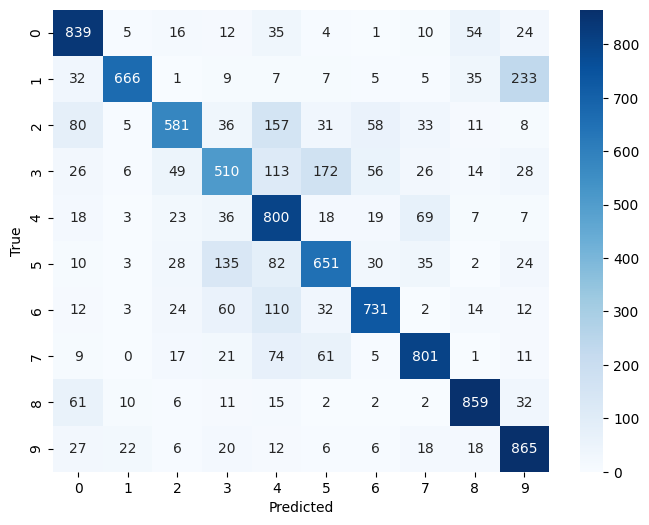

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##Penugasan

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 26ms/step - accuracy: 0.8960 - loss: 0.3570 - val_accuracy: 0.9808 - val_loss: 0.0724
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9808 - loss: 0.0657 - val_accuracy: 0.9853 - val_loss: 0.0567
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9822 - val_loss: 0.0679
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9906 - loss: 0.0292 - val_accuracy: 0.9863 - val_loss: 0.0475
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9932 - loss: 0.0204 - val_accuracy: 0.9892 - val_loss: 0.0493


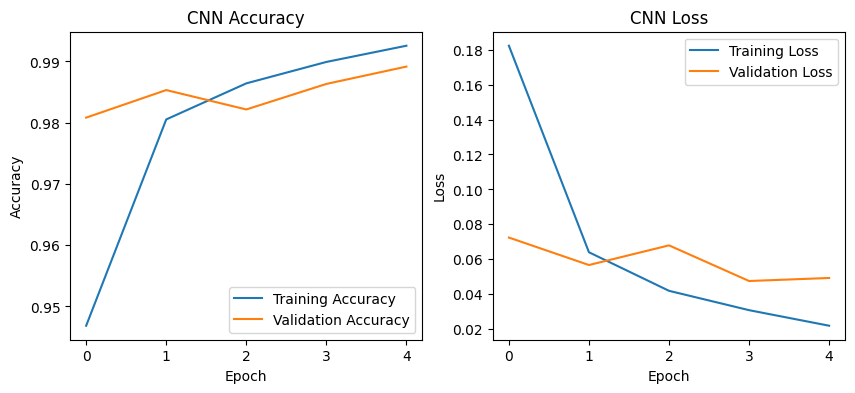

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist # Import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Add data loading

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [3]:
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]

    return canvas, arr


Saving 0.jpg to 0 (1).jpg
Saving 5.jpg to 5.jpg
Saving 8.jpg to 8.jpg


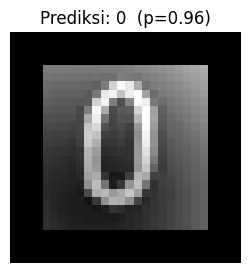

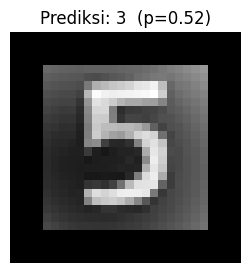

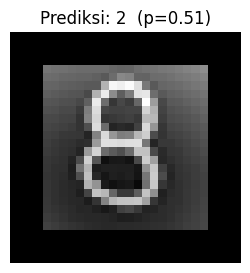

Rekap Prediksi (CNN):
- 0 (1).jpg -> 0 (p=0.963)
- 5.jpg -> 3 (p=0.516)
- 8.jpg -> 2 (p=0.512)


In [4]:
import matplotlib.pyplot as plt

results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)   # disp: PIL untuk ditampilkan, x: (28,28,1)
    x_batch = np.expand_dims(x, axis=0)            # (1,28,28,1)
    probs = model.predict(x_batch, verbose=0)[0]   # shape (10,)
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))

    results.append((fname, pred, conf))

    # Tampilkan hasil
    plt.figure(figsize=(3,3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred}  (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# Rekap ringkas
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")
